<a href="https://colab.research.google.com/github/angel870326/Monthly-Revenue-Forecasting/blob/main/020_benchmark_rf_xgb_rnn_lstm_dnn_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2023.05.26 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

# **Monthly Revenue Forecasting with Benchmark, Random Forest Regressor, XGB Regressor, RNN, LSTM & DNN - Comparison (2018-2022)**

### Contents

0. Setup
1. Input Data
2. MAE
  * 2.0 Select Score Type
  * 2.1 Calculate Mean & Standard Deviation
  * 2.2 Filter Top Models
  * 2.3 Plot by Year
  * 2.4 Plot Benchmark by Year (*new)
3. MAE%
  * 3.0 Select Score Type
  * 3.1 Calculate Mean & Standard Deviation
  * 3.2 Filter Top Models
  * 3.3 Plot by Year
  * 3.4 Plot Benchmark by Year (*new)
4. Plot Monthly Revenue by Year



## **0. Setup**

In [1]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **1. Input Data**


In [ ]:
path = '/content/gdrive/Shareddrives/Me/論文/Results'
category = 2013

def getScores(modelName: str):
    if modelName == 'benchmark':
        scores = pd.read_excel(os.path.join(path, f'benchmark/scores_{modelName}_{category}.xlsx'), index_col = 0)
    else:
        scores = pd.read_excel(os.path.join(path, f'{category}/scores_{modelName}_{category}.xlsx'), index_col = 0)
    return scores

In [ ]:
scores_rf = getScores('rf')
scores_xgb = getScores('xgb')
scores_rnn = getScores('rnn')
scores_lstm = getScores('lstm')
scores_dnn = getScores('dnn')
scores_benchmark = getScores('benchmark')

In [ ]:
print(scores_rf.shape)
print(scores_xgb.shape)
print(scores_rnn.shape)
print(scores_lstm.shape)
print(scores_dnn.shape)
print(scores_benchmark.shape)

(60, 24)
(60, 24)
(60, 24)
(60, 24)
(60, 24)
(60, 4)


## **2. MAE**

In [ ]:
output_path = '/content/gdrive/Shareddrives/Me/論文/Compare'

### **2.0 Select Score Type**

In [ ]:
def selectScoreType(scoreD: pd.DataFrame, scoreType: str, modelName: str):
    col = [col for col in scoreD.columns if f'{scoreType}-' in col]
    df = scoreD[col]
    if modelName == 'Benchmark':
        df.columns = [modelName]
    else:
        df.columns = [modelName + ' - ' + s for s in ['org', 'def', 'dec', 'dec_def', 'season_adj', 'season_def']]
    return df

def concatScores(scoreType: str):
    rf = selectScoreType(scores_rf, scoreType, 'Random Forest')
    xgb = selectScoreType(scores_xgb, scoreType, 'XGB')
    rnn = selectScoreType(scores_rnn, scoreType, 'RNN')
    lstm = selectScoreType(scores_lstm, scoreType, 'LSTM')
    dnn = selectScoreType(scores_dnn, scoreType, 'DNN')
    benchmark = selectScoreType(scores_benchmark, scoreType, 'Benchmark')
    concat = pd.concat([benchmark, rf, xgb, rnn, lstm, dnn], axis=1)
    # concat = pd.concat([rf, xgb], axis=1)
    return concat

In [ ]:
mae = concatScores('MAE')
mae

,Benchmark,Random Forest - org,Random Forest - def,Random Forest - dec,Random Forest - dec_def,Random Forest - season_adj,Random Forest - season_def,XGB - org,XGB - def,XGB - dec,...,LSTM - dec,LSTM - dec_def,LSTM - season_adj,LSTM - season_def,DNN - org,DNN - def,DNN - dec,DNN - dec_def,DNN - season_adj,DNN - season_def
2018-01,1024039,398399,240879,420289,273549,387840,233186,330349,212174,358017,...,275952,241901,315618,236827,249854,238369,261020,243914,269393,243691
2018-02,374468,264191,252623,293304,272306,273152,401686,242034,291795,316114,...,260189,278199,256452,403633,269506,235805,266022,247084,252560,360514
2018-03,447286,262229,172643,311624,215438,279766,263927,234903,207098,339650,...,223083,235870,273007,266292,198653,214838,224584,200718,276777,265164
2018-04,351256,290365,144183,335629,174977,306170,235749,267589,141005,309584,...,242278,147548,246802,228409,258311,156882,231761,210946,228755,228703
2018-05,205134,302027,145711,337588,166675,323104,225644,332902,127773,300582,...,228415,137180,360492,245750,203271,131636,187218,126582,285461,241084
2018-06,211394,318040,199209,371169,195801,328463,253668,276458,159087,323473,...,263307,177003,324210,262952,252189,170894,226093,169410,304306,243311
2018-07,213870,306893,140574,344646,146315,319697,183798,301514,139722,279895,...,207875,153276,271633,196395,186264,162937,209161,126217,231908,191657
2018-08,162810,303746,178119,353948,187452,334085,242148,294736,151054,346162,...,198579,163348,307014,189966,184281,146317,177277,193843,282498,204917
2018-09,241857,382812,247428,426595,239270,422414,293841,318330,192041,322252,...,251724,215978,308105,287920,259254,199479,249742,210143,348663,280994
2018-10,325551,390725,268484,443226,282619,408452,355234,365194,209365,436838,...,305671,271256,408859,355963,241306,274434,214859,207133,384070,372012


In [ ]:
mae.to_excel(os.path.join(output_path, f'{category}/mae_{category}.xlsx'))

### **2.1 Calculate Mean & Standard Deviation**

In [ ]:
def calculateMeanStd(scoreD: pd.DataFrame, percent: bool=False):
    if percent == True:
        digit = 4
    else:
        digit = 0

    mean = round(scoreD.mean(axis=0), digit)
    std = round(scoreD.std(axis=0), digit)
    min = round(scoreD.min(axis=0), digit)
    median = round(scoreD.median(axis=0), digit)
    max = round(scoreD.max(axis=0), digit)
    mean_std = pd.concat([mean, std, min, median, max], axis=1)
    mean_std.columns = ['mean', 'std', 'min', 'median', 'max']

    mean_std['mean_rank'] = mean_std['mean'].rank(ascending=True)
    mean_std['std_rank'] = mean_std['std'].rank(ascending=True)
    mean_std['min_rank'] = mean_std['min'].rank(ascending=True)
    mean_std['median_rank'] = mean_std['median'].rank(ascending=True)
    mean_std['max_rank'] = mean_std['max'].rank(ascending=True)

    if percent == True:
        mean_std = mean_std.astype(float)
    else:
        mean_std = mean_std.astype(int)

    index_split = pd.Series(mean_std.index).str.split(" - ", expand=True)
    mean_std = mean_std.reset_index(drop=True)
    # mean_std[['modelName', 'dataType']] = mean_std['index'].str.split(" - ", expand=True)
    mean_std.insert(loc=0, column='Model', value = index_split[0])
    mean_std.insert(loc=1, column='Data Type', value = index_split[1])

    return mean_std

In [ ]:
mae_mean_std = calculateMeanStd(mae)
mae_mean_std

,Model,Data Type,mean,std,min,median,max,mean_rank,std_rank,min_rank,median_rank,max_rank
0,Benchmark,None,327931,145843,149319,304452,1024039,21,29,11,21,31
1,Random Forest,org,378229,99491,236181,344412,624279,24,18,27,24,16
2,Random Forest,def,230414,79998,126433,211038,469726,2,4,5,3,1
3,Random Forest,dec,442163,119148,257956,419219,753829,29,25,30,29,24
4,Random Forest,dec_def,246577,81225,141820,228251,490914,10,7,9,10,6
5,Random Forest,season_adj,402303,111376,245015,371465,690128,28,21,28,27,20
6,Random Forest,season_def,298432,77550,183798,287740,489999,11,2,19,18,5
7,XGB,org,385053,113232,220116,385674,792473,25,23,24,28,26
8,XGB,def,220569,85188,115374,205221,500250,1,13,1,1,9
9,XGB,dec,451682,151733,270762,427594,911565,30,30,31,30,29


In [ ]:
mae_mean_std.to_excel(os.path.join(output_path, f'{category}/mae_mean_std_{category}.xlsx'), index = False)

### **2.2 Filter Top Models**

In [ ]:
# Filter top models
def topModel(mean_std: pd.DataFrame):
    top = mean_std[(mean_std['mean_rank'] <= 10) & (mean_std['median_rank'] <= 10)]
    return top

In [ ]:
topModel(mae_mean_std)

,Model,Data Type,mean,std,min,median,max,mean_rank,std_rank,min_rank,median_rank,max_rank
2,Random Forest,def,230414,79998,126433,211038,469726,2,4,5,3,1
4,Random Forest,dec_def,246577,81225,141820,228251,490914,10,7,9,10,6
8,XGB,def,220569,85188,115374,205221,500250,1,13,1,1,9
10,XGB,dec_def,237226,85022,141850,218577,489779,6,12,10,6,4
14,RNN,def,238448,81869,131933,222086,522052,7,8,6,8,11
16,RNN,dec_def,238811,84167,116678,214418,495796,8,11,2,4,7
20,LSTM,def,234290,74622,134356,218132,470101,4,1,8,5,2
22,LSTM,dec_def,239325,93841,132049,224983,560480,9,16,7,9,14
26,DNN,def,233600,82769,118886,220928,481209,3,10,3,7,3
28,DNN,dec_def,234501,82086,119973,208638,501851,5,9,4,2,10


### **2.3 Plot by Year**

In [ ]:
# 根據不同年份畫出單一模型單一資料類型的單一預測分數
def plotSingleModelScoreByYear(modelName: str, dataType: str, scoreD: pd.DataFrame, percent: bool=False):
    scores = scoreD[f'{modelName} - {dataType}']
    months = list(range(1,13))
    # Plot
    plt.plot(months, scores[0:12], label = '2018')
    plt.plot(months, scores[12:24], label = '2019')
    plt.plot(months, scores[24:36], label = '2020')
    plt.plot(months, scores[36:48], label = '2021')
    plt.plot(months, scores[48:60], label = '2022')

    plt.xticks(months)
    if percent == True:
        plt.yticks(np.arange(0.05, 0.3, 0.05))
    else:
        plt.yticks(range(100000, 600000, 50000))
    plt.legend(ncol=5, loc = 'upper left')

In [ ]:
# 根據不同年份畫出單一模型平減資料和拆解後平減資料的單一預測分數
def plotModelScoreByYear(modelName: str, scoreD: pd.DataFrame, scoreType: str, percent: bool=False):
    plt.figure(figsize = (15,4))
    # deflating
    plt.subplot(1,2,1)
    plt.title(f"{scoreType} of {modelName} with Deflating Data", size = 14)
    plotSingleModelScoreByYear(modelName, 'def', scoreD, percent)
    # decomposed + deflating
    plt.subplot(1,2,2)
    plt.title(f"{scoreType} of {modelName} with Decomposed + Deflating Data", size = 14)
    plotSingleModelScoreByYear(modelName, 'dec_def', scoreD, percent)
    plt.show()

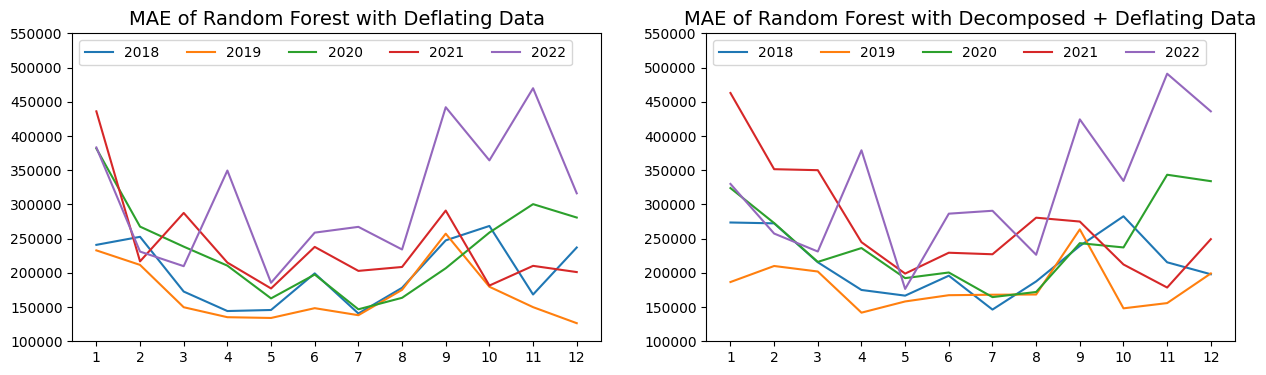

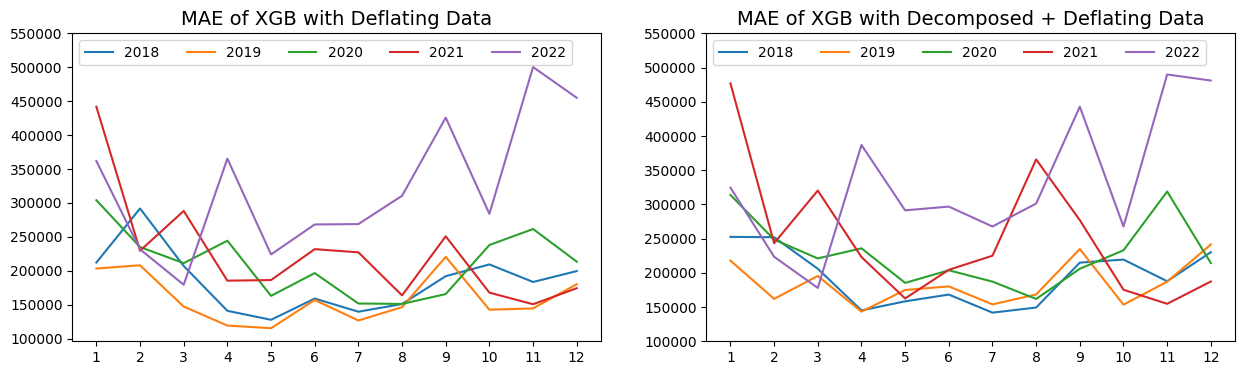

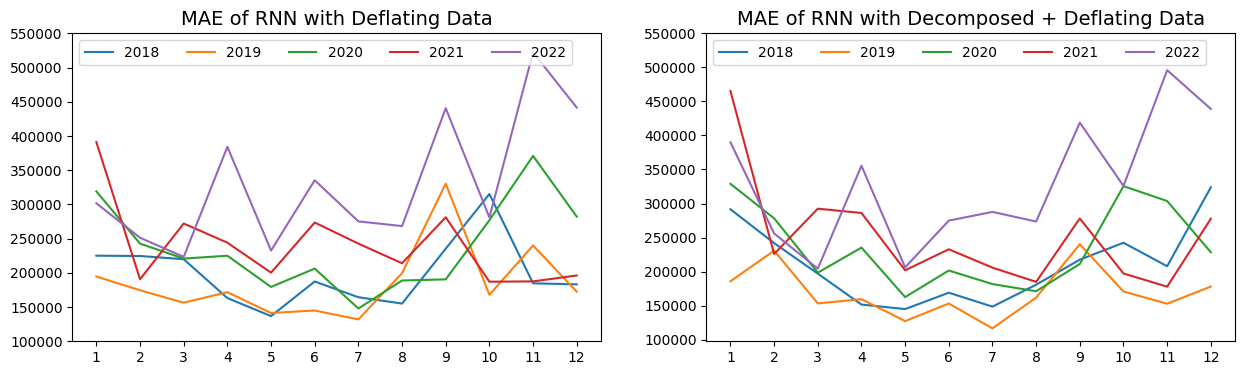

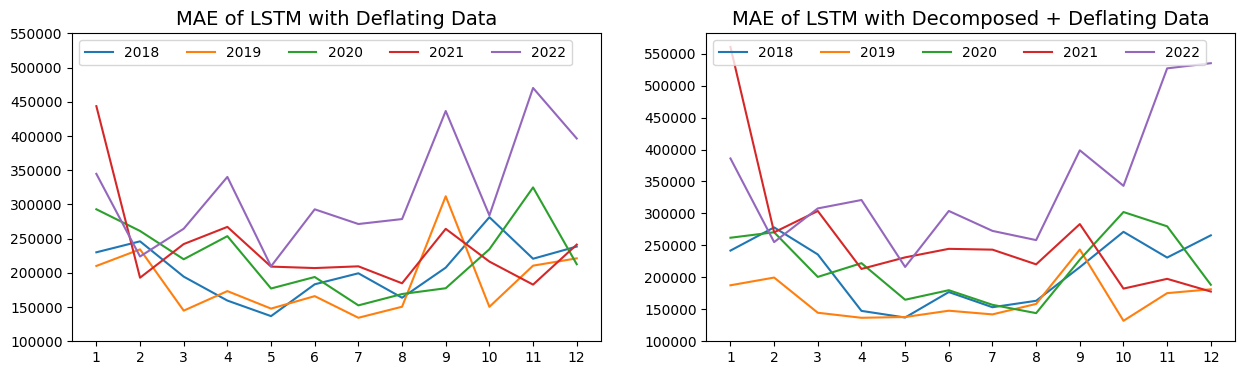

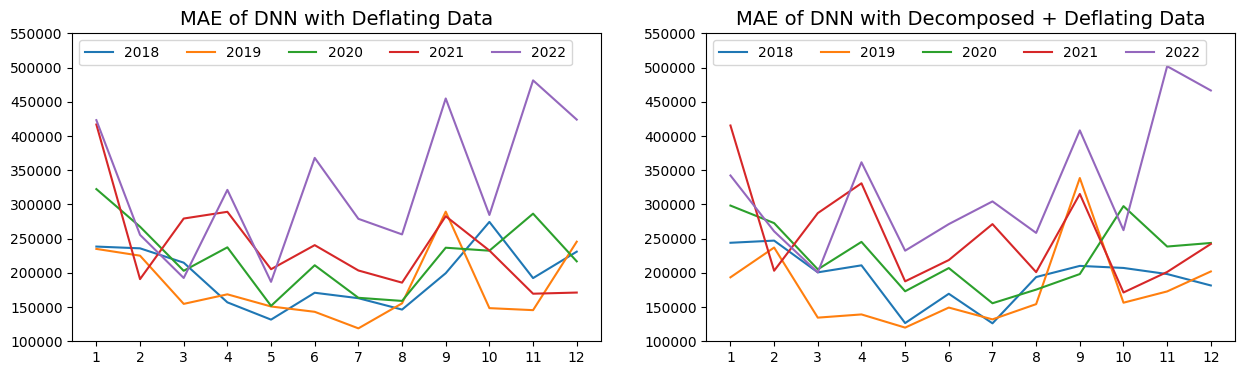

In [ ]:
plotModelScoreByYear('Random Forest', mae, 'MAE')
plotModelScoreByYear('XGB', mae, 'MAE')
plotModelScoreByYear('RNN', mae, 'MAE')
plotModelScoreByYear('LSTM', mae, 'MAE')
plotModelScoreByYear('DNN', mae, 'MAE')

### **2.4 Plot Benchmark by Year**

2023.06.01

In [ ]:
# 根據不同年份畫出 Benchmark 的單一預測分數
def plotBenchmarkScoreByYear( scoreD: pd.DataFrame, scoreType: str, percent: bool=False):
    scores = scoreD['Benchmark']
    months = list(range(1,13))
    # Plot
    plt.figure(figsize = (15,6))
    plt.title(f"{scoreType} of Benchmark", size = 14)
    plt.plot(months, scores[0:12], label = '2018')
    plt.plot(months, scores[12:24], label = '2019')
    plt.plot(months, scores[24:36], label = '2020')
    plt.plot(months, scores[36:48], label = '2021')
    plt.plot(months, scores[48:60], label = '2022')

    plt.xticks(months)
    if percent == True:
        plt.yticks(np.arange(0.05, 0.6, 0.05))
    else:
        plt.yticks(range(100000, 1100000, 50000))
    plt.legend(ncol=5, loc = 'upper left')
    plt.show()

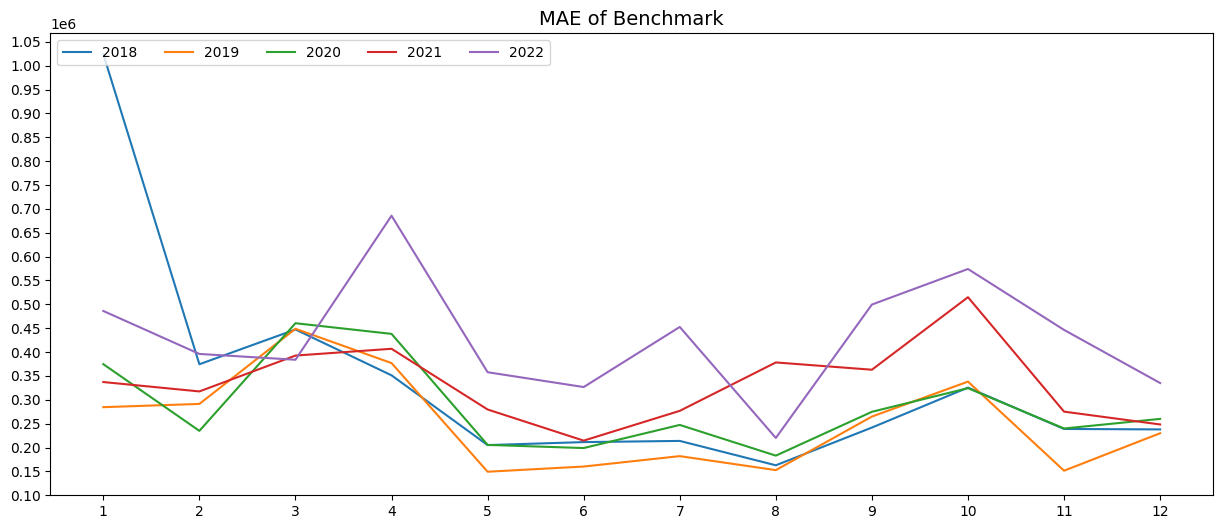

In [ ]:
plotBenchmarkScoreByYear(mae, 'MAE')

## **3. MAE%**

### **3.0 Select Score Type**

In [ ]:
mae_p = concatScores('MAE%')
mae_p

,Benchmark,Random Forest - org,Random Forest - def,Random Forest - dec,Random Forest - dec_def,Random Forest - season_adj,Random Forest - season_def,XGB - org,XGB - def,XGB - dec,...,LSTM - dec,LSTM - dec_def,LSTM - season_adj,LSTM - season_def,DNN - org,DNN - def,DNN - dec,DNN - dec_def,DNN - season_adj,DNN - season_def
2018-01,0.5257,0.2045,0.1237,0.2158,0.1404,0.1991,0.1197,0.1696,0.1089,0.1838,...,0.1417,0.1242,0.1620,0.1216,0.1283,0.1224,0.1340,0.1252,0.1383,0.1251
2018-02,0.2513,0.1773,0.1695,0.1968,0.1827,0.1833,0.2696,0.1624,0.1958,0.2121,...,0.1746,0.1867,0.1721,0.2709,0.1809,0.1582,0.1785,0.1658,0.1695,0.2419
2018-03,0.2382,0.1397,0.0920,0.1660,0.1147,0.1490,0.1406,0.1251,0.1103,0.1809,...,0.1188,0.1256,0.1454,0.1418,0.1058,0.1144,0.1196,0.1069,0.1474,0.1412
2018-04,0.1958,0.1619,0.0804,0.1871,0.0976,0.1707,0.1314,0.1492,0.0786,0.1726,...,0.1351,0.0823,0.1376,0.1273,0.1440,0.0875,0.1292,0.1176,0.1275,0.1275
2018-05,0.1083,0.1595,0.0770,0.1783,0.0880,0.1706,0.1192,0.1758,0.0675,0.1587,...,0.1206,0.0724,0.1904,0.1298,0.1074,0.0695,0.0989,0.0669,0.1508,0.1273
2018-06,0.1104,0.1661,0.1040,0.1939,0.1023,0.1716,0.1325,0.1444,0.0831,0.1689,...,0.1375,0.0924,0.1693,0.1373,0.1317,0.0893,0.1181,0.0885,0.1589,0.1271
2018-07,0.1087,0.1559,0.0714,0.1751,0.0743,0.1624,0.0934,0.1532,0.0710,0.1422,...,0.1056,0.0779,0.1380,0.0998,0.0946,0.0828,0.1063,0.0641,0.1178,0.0974
2018-08,0.0791,0.1475,0.0865,0.1719,0.0910,0.1623,0.1176,0.1432,0.0734,0.1681,...,0.0965,0.0793,0.1491,0.0923,0.0895,0.0711,0.0861,0.0942,0.1372,0.0995
2018-09,0.1083,0.1715,0.1108,0.1911,0.1072,0.1892,0.1316,0.1426,0.0860,0.1443,...,0.1127,0.0967,0.1380,0.1290,0.1161,0.0893,0.1119,0.0941,0.1562,0.1259
2018-10,0.1422,0.1706,0.1172,0.1936,0.1234,0.1784,0.1551,0.1595,0.0914,0.1908,...,0.1335,0.1185,0.1785,0.1554,0.1054,0.1198,0.0938,0.0905,0.1677,0.1625


In [ ]:
mae_p.to_excel(os.path.join(output_path, f'{category}/mae_p_{category}.xlsx'))

### **3.1 Calculate Mean & Standard Deviation**

In [ ]:
mae_p_mean_std = calculateMeanStd(mae_p, True)
mae_p_mean_std

,Model,Data Type,mean,std,min,median,max,mean_rank,std_rank,min_rank,median_rank,max_rank
0,Benchmark,None,0.1544,0.0720,0.0694,0.1414,0.5257,21.0,31.0,11.0,22.0,31.0
1,Random Forest,org,0.1746,0.0313,0.1256,0.1688,0.2709,24.0,1.0,27.0,25.0,14.0
2,Random Forest,def,0.1077,0.0359,0.0597,0.1006,0.2222,2.0,8.5,3.0,3.0,9.0
3,Random Forest,dec,0.2034,0.0338,0.1489,0.1937,0.2868,29.0,4.0,31.0,29.0,16.0
4,Random Forest,dec_def,0.1153,0.0362,0.0662,0.1064,0.2103,10.0,10.0,8.0,9.0,5.0
5,Random Forest,season_adj,0.1852,0.0340,0.1304,0.1771,0.2893,28.0,5.0,29.0,28.0,17.0
6,Random Forest,season_def,0.1405,0.0403,0.0846,0.1322,0.2907,12.0,15.0,16.0,13.0,18.0
7,XGB,org,0.1780,0.0419,0.1172,0.1708,0.3186,25.0,19.5,25.0,26.0,24.0
8,XGB,def,0.1031,0.0375,0.0559,0.0921,0.2029,1.0,12.0,1.0,1.0,3.0
9,XGB,dec,0.2081,0.0538,0.1296,0.1965,0.3697,30.0,29.0,28.0,30.0,29.0


In [ ]:
mae_p_mean_std.to_excel(os.path.join(output_path, f'{category}/mae_p_mean_std_{category}.xlsx'), index = False)

### **3.2 Filter Top Models**

In [ ]:
topModel(mae_p_mean_std)

,Model,Data Type,mean,std,min,median,max,mean_rank,std_rank,min_rank,median_rank,max_rank
2,Random Forest,def,0.1077,0.0359,0.0597,0.1006,0.2222,2.0,8.5,3.0,3.0,9.0
4,Random Forest,dec_def,0.1153,0.0362,0.0662,0.1064,0.2103,10.0,10.0,8.0,9.0,5.0
8,XGB,def,0.1031,0.0375,0.0559,0.0921,0.2029,1.0,12.0,1.0,1.0,3.0
10,XGB,dec_def,0.1106,0.0357,0.0574,0.1042,0.2167,6.0,7.0,2.0,6.0,8.0
14,RNN,def,0.1107,0.0328,0.0682,0.1067,0.2117,7.0,3.0,10.0,10.0,7.0
16,RNN,dec_def,0.1114,0.0367,0.0603,0.1010,0.2115,9.0,11.0,5.0,4.0,6.0
20,LSTM,def,0.1094,0.0321,0.0678,0.1021,0.2016,4.0,2.0,9.0,5.0,2.0
22,LSTM,dec_def,0.1113,0.0398,0.0601,0.1045,0.2547,8.0,14.0,4.0,7.0,11.0
26,DNN,def,0.1090,0.0353,0.0607,0.1060,0.1970,3.0,6.0,6.0,8.0,1.0
28,DNN,dec_def,0.1095,0.0359,0.0633,0.0982,0.2035,5.0,8.5,7.0,2.0,4.0


### **3.3 Plot by Year**

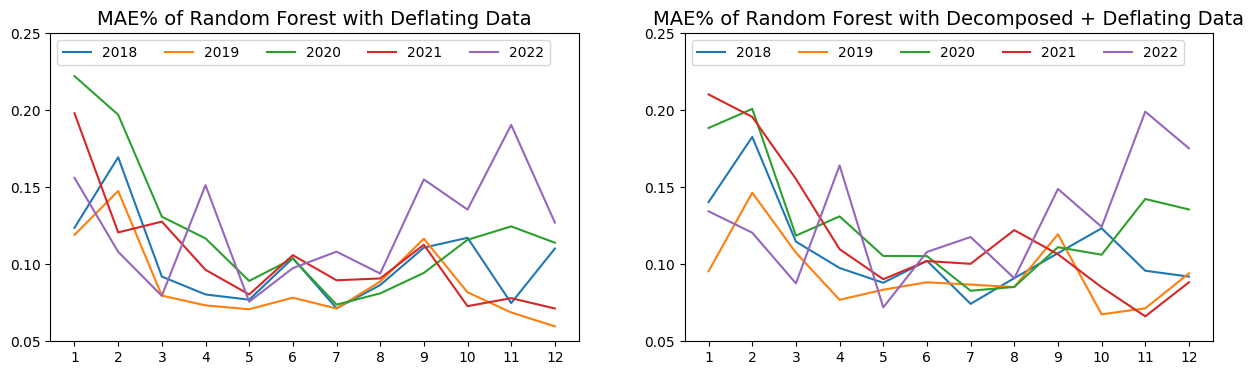

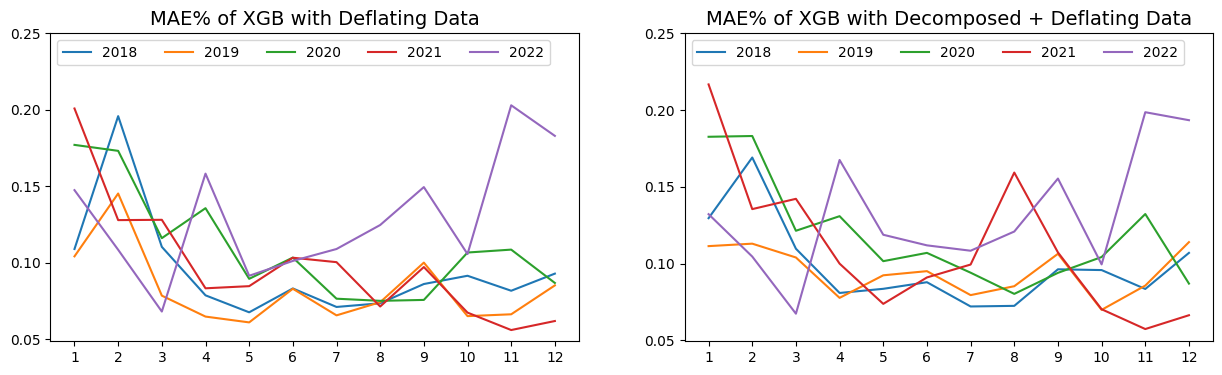

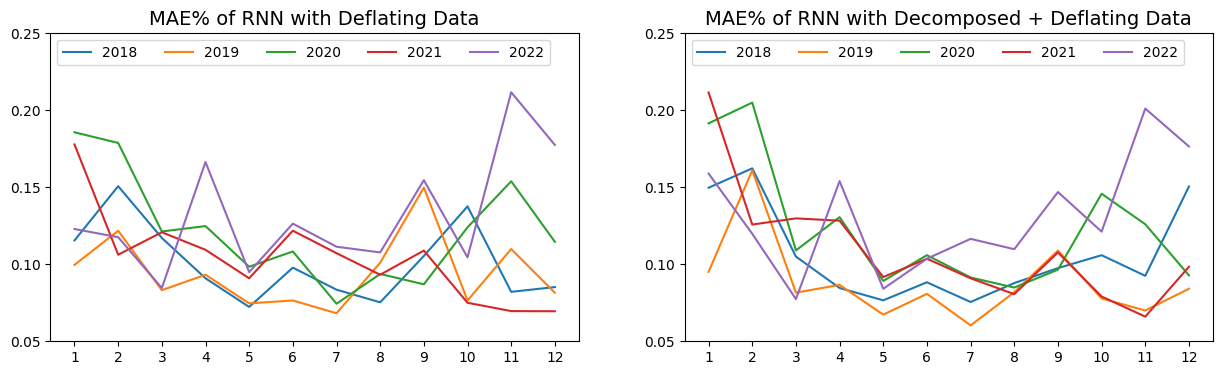

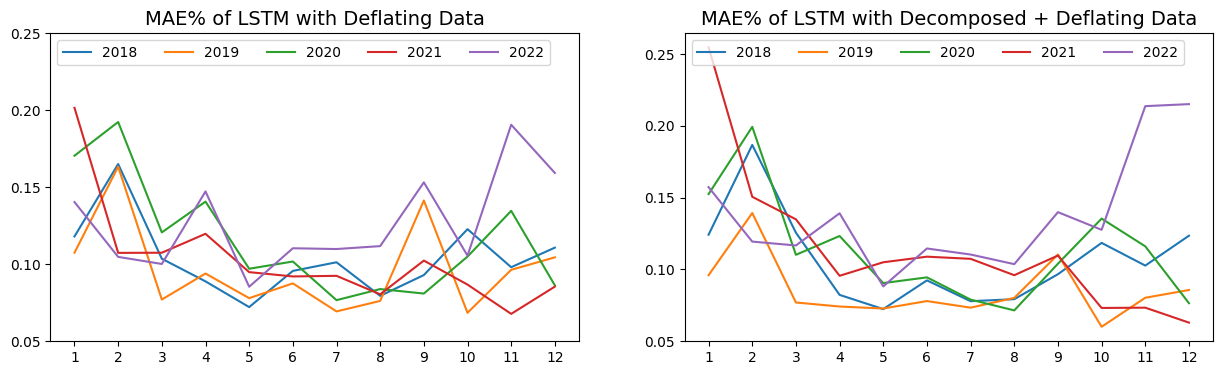

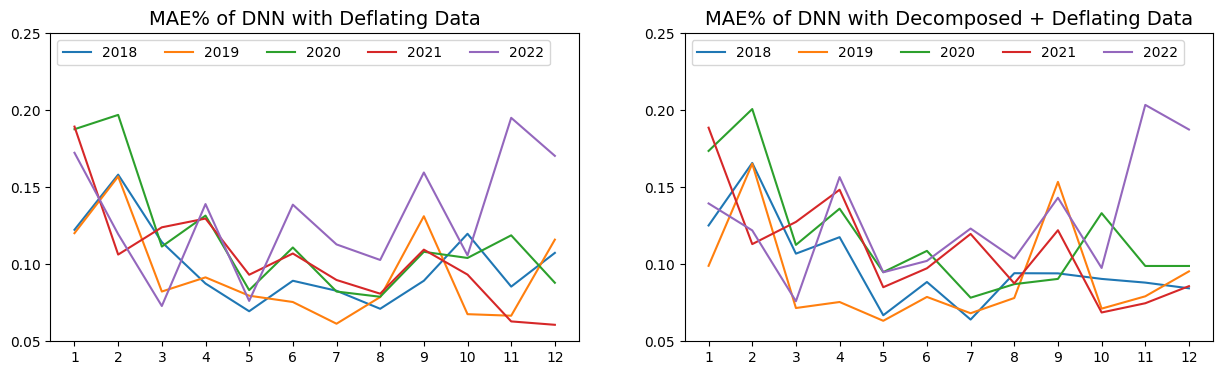

In [ ]:
plotModelScoreByYear('Random Forest', mae_p, 'MAE%', True)
plotModelScoreByYear('XGB', mae_p, 'MAE%', True)
plotModelScoreByYear('RNN', mae_p, 'MAE%', True)
plotModelScoreByYear('LSTM', mae_p, 'MAE%', True)
plotModelScoreByYear('DNN', mae_p, 'MAE%', True)

### **3.4 Plot Benchmark by Year**

2023.06.01

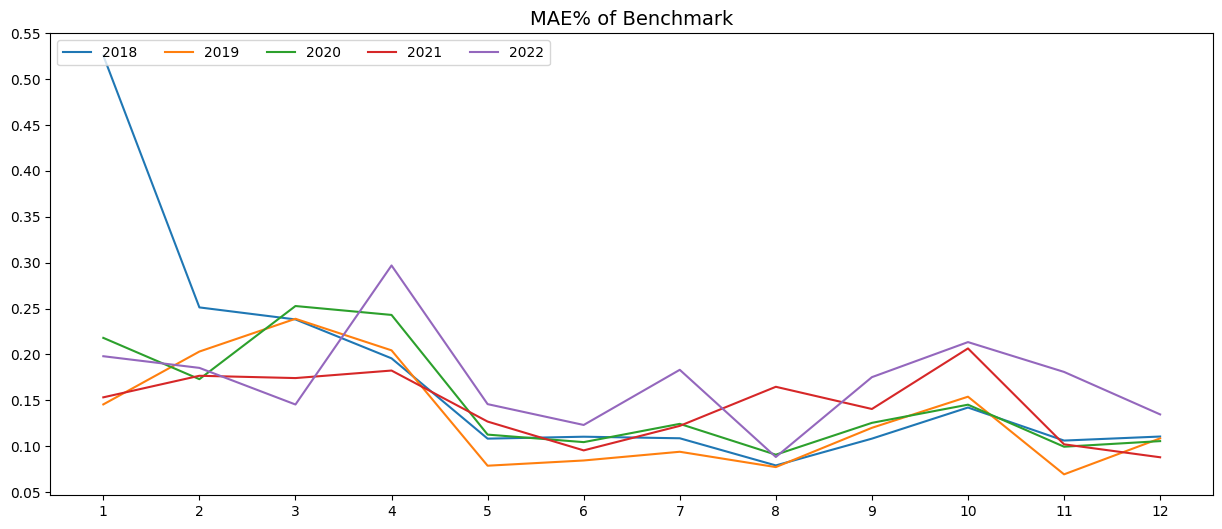

In [ ]:
plotBenchmarkScoreByYear(mae_p, 'MAE%', True)

## **4. Plot Monthly Revenue by Year**

In [3]:
project_path = '/content/gdrive/Shareddrives/Me/論文'

In [4]:
org_data = pd.read_excel(os.path.join(project_path, '資料集/007_v1/201301-202212上市櫃公司月營收_非金融業.xlsx'), index_col=0)
org_data.columns = pd.to_datetime(org_data.columns, format="%Y-%m-%d").to_period('M')
org_data

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
公司,,,,,,,,,,,,,,,,,,,,,
1101 台泥,9134465,5540346,9457971,9919269,9543782,9517630,9875888,9835143,10060975,10654077,...,9971650,8319342,7733787,9145989,10102468,10689860,10404901,11368096,9674576,12584154
1102 亞泥,6018213,2552357,5428755,5930748,6239676,5952754,5942364,5786107,5879394,6478670,...,8160414,8710220,8000427,7776413,7864622,7069221,6994078,7601097,8306062,8340507
1103 嘉泥,288455,166638,286007,365292,382601,302995,294781,336088,314563,429783,...,220463,168089,163521,183177,178825,182371,205264,209429,221763,228644
1104 環泥,486481,299860,461732,394631,406677,415968,453397,393203,448691,521445,...,591593,638493,537082,573028,580420,605512,597159,634981,631827,725055
1108 幸福,481802,276936,444917,362054,381384,368109,439572,379115,387362,450770,...,345612,335518,332258,334113,326691,390053,346635,401202,383773,418326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,201785,167967,240746,243935,238296,193880,198427,256724,228796,250756,...,374229,302262,323433,371791,337581,468608,464373,432835,500111,506796
9955 佳龍,394489,383183,428478,564053,336622,295391,434605,306534,266617,363766,...,96200,101850,95096,80726,85625,81881,79179,80630,91270,84115
9958 世紀鋼,198944,166364,351222,280864,289332,426371,213281,302589,401695,255738,...,626104,401960,673479,665459,651699,757968,903198,911834,944060,1082675


In [5]:
def plotMonthlyRevenueByYear(data: pd.Series):
    months = list(range(1,13))
    # Plot
    plt.figure(figsize = (15,8))
    plt.title("Average Monthly Revenue (2018-2022)", size = 14)
    # plt.plot(months, data[0:12], label = '2013')
    # plt.plot(months, data[12:24], label = '2014')
    # plt.plot(months, data[24:36], label = '2015')
    # plt.plot(months, data[36:48], label = '2016')
    # plt.plot(months, data[48:60], label = '2017')
    plt.plot(months, data[60:72], label = '2018')
    plt.plot(months, data[72:84], label = '2019')
    plt.plot(months, data[84:96], label = '2020')
    plt.plot(months, data[96:108], label = '2021')
    plt.plot(months, data[108:120], label = '2022')
    plt.xticks(months)
    # plt.yticks(range(100000, 600000, 50000))
    plt.legend(ncol=5, loc = 'upper left')
    plt.show()

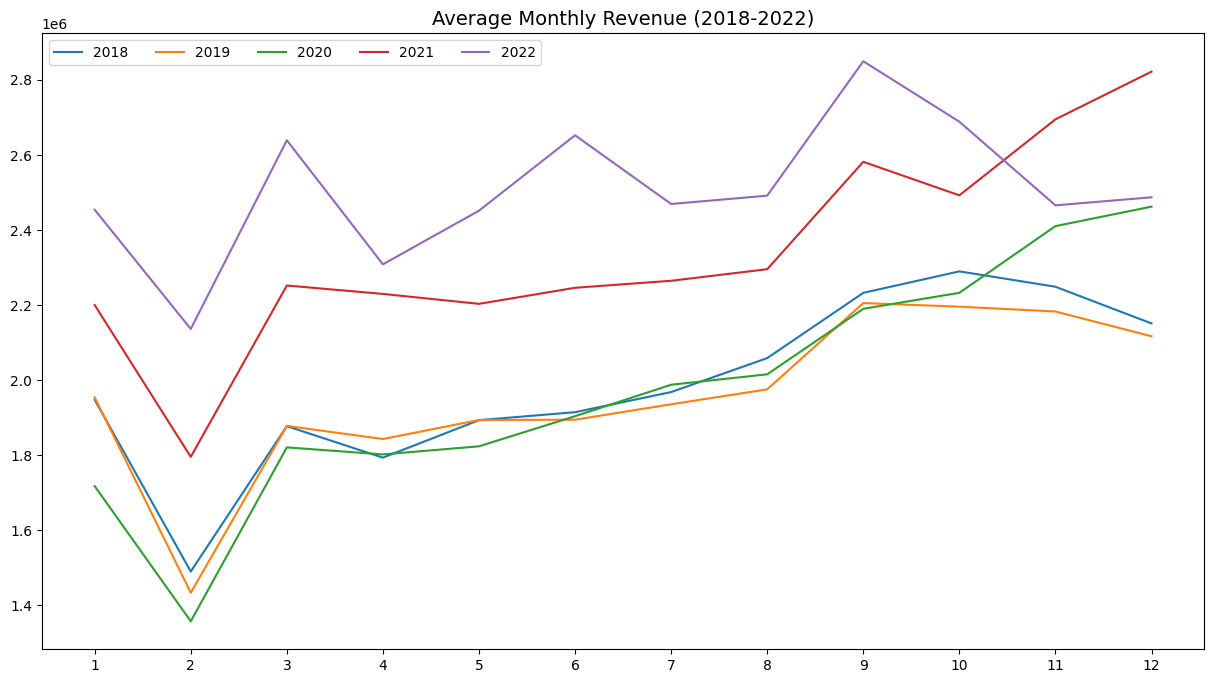

In [6]:
plotMonthlyRevenueByYear(org_data.mean())